In [1]:
import numpy as np
import pickle
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import pandas as pd

np.random.seed(123)

In [2]:
#deserilaizing the data 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# Load batch-1

X = unpickle('data_batch_1')
img_data = X[b'data']
img_label_orig = img_label = X[b'labels']
img_label = np.array(img_label).reshape(-1, 1)


#Now that our data and labels are loaded lets check their presence 
print('shape', img_data.shape)
#Perfect the shape is 10000 * 3072 ,that is 10k examples ,each example has 32* 32 image which is 1024 pixels ,hence each pixel has three levels (r,g,b)
#we get 1024 * 3 = 3072 values for a sigle image out of 10k datapoints.

#Now, let's look into labels in data_batch_1
print(img_label)
print('shape', img_label.shape)


shape (10000, 3072)
[[6]
 [9]
 [9]
 ...
 [1]
 [1]
 [5]]
shape (10000, 1)


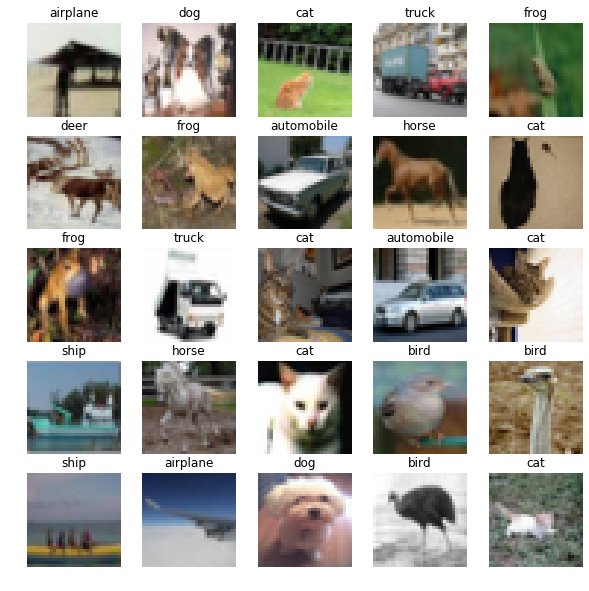

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}


# Data Visualization
X = img_data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(img_label)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(10,10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])
        axes1[j][k].title.set_text(label_dict[Y[i][0]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(img_data, img_label, test_size = 0.1, random_state = 0) 

In [6]:
# Model fitting
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
# Model Predictions
y_pred = knn.predict(X_test)
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy:0.275


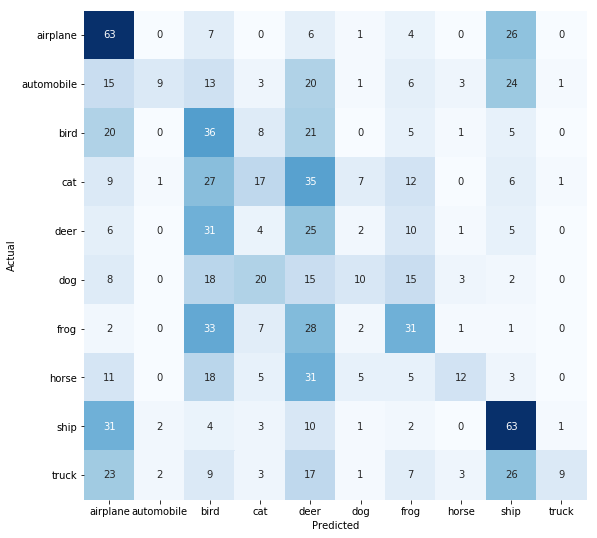

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()